# **Problema**

* Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

* A base de dados exemplos está anexada como exemplo.csv.

* Você precisa alimentar ela com mais informações ou utilizar uma outra de sua preferência.

# **Tarefas**

Exploração de dados:

  * Carregue a base de dados e explore suas características.
  * Analise estatísticas descritivas e visualize distribuições relevantes.
       
Pré-processamento de dados:
      
  * Realize a limpeza dos dados, tratando valores ausentes (se necessário).
  * Converta variáveis categóricas em formatos adequados para modelagem.

Modelagem:
    
  * Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).      
  * Divida o conjunto de dados em conjuntos de treinamento e teste.

Treinamento e avaliação do modelo:

  * Treine o modelo com o conjunto de treinamento.
         
Validação estatística:
  * Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).


**O que avaliaremos:**

  * Apresente resultados visuais, como gráficos de previsões vs. valores reais.
  * Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.
  
**Observações:**

  * Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.
       

# **Entrega**

 * Como entregável, o grupo deve enviar um vídeo junto com o link do github do projeto e o código desenvolvido, apresentando o passo a passo do que foi utilizado como a fonte de dados e como os modelos foram criados.
  
 * O vídeo deve estar em uma plataforma como Youtube.


# **Solução**



In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

In [142]:
dataset = pd.read_csv("medical_insurance.csv")

In [143]:
dataset.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,56,feminino,29.774374,2,sim,sudoeste,31109.889763
1,46,masculino,25.857395,1,não,nordeste,26650.702647
2,32,masculino,23.014840,0,não,sudoeste,21459.037990
3,19,feminino,27.900000,0,sim,sudoeste,16884.924000
4,18,masculino,33.770000,1,não,sudeste,1725.552300


In [144]:
dataset.shape

(2775, 7)

In [145]:
dataset.describe()

,idade,imc,filhos,encargos
count,2775.000000,2775.000000,2775.000000,2775.000000
mean,39.115676,30.696500,1.101622,13275.580957
std,14.078750,6.128585,1.214450,12153.570834
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4703.000275
50%,39.000000,30.400000,1.000000,9361.326800
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


In [146]:
dataset.isnull().sum()

idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

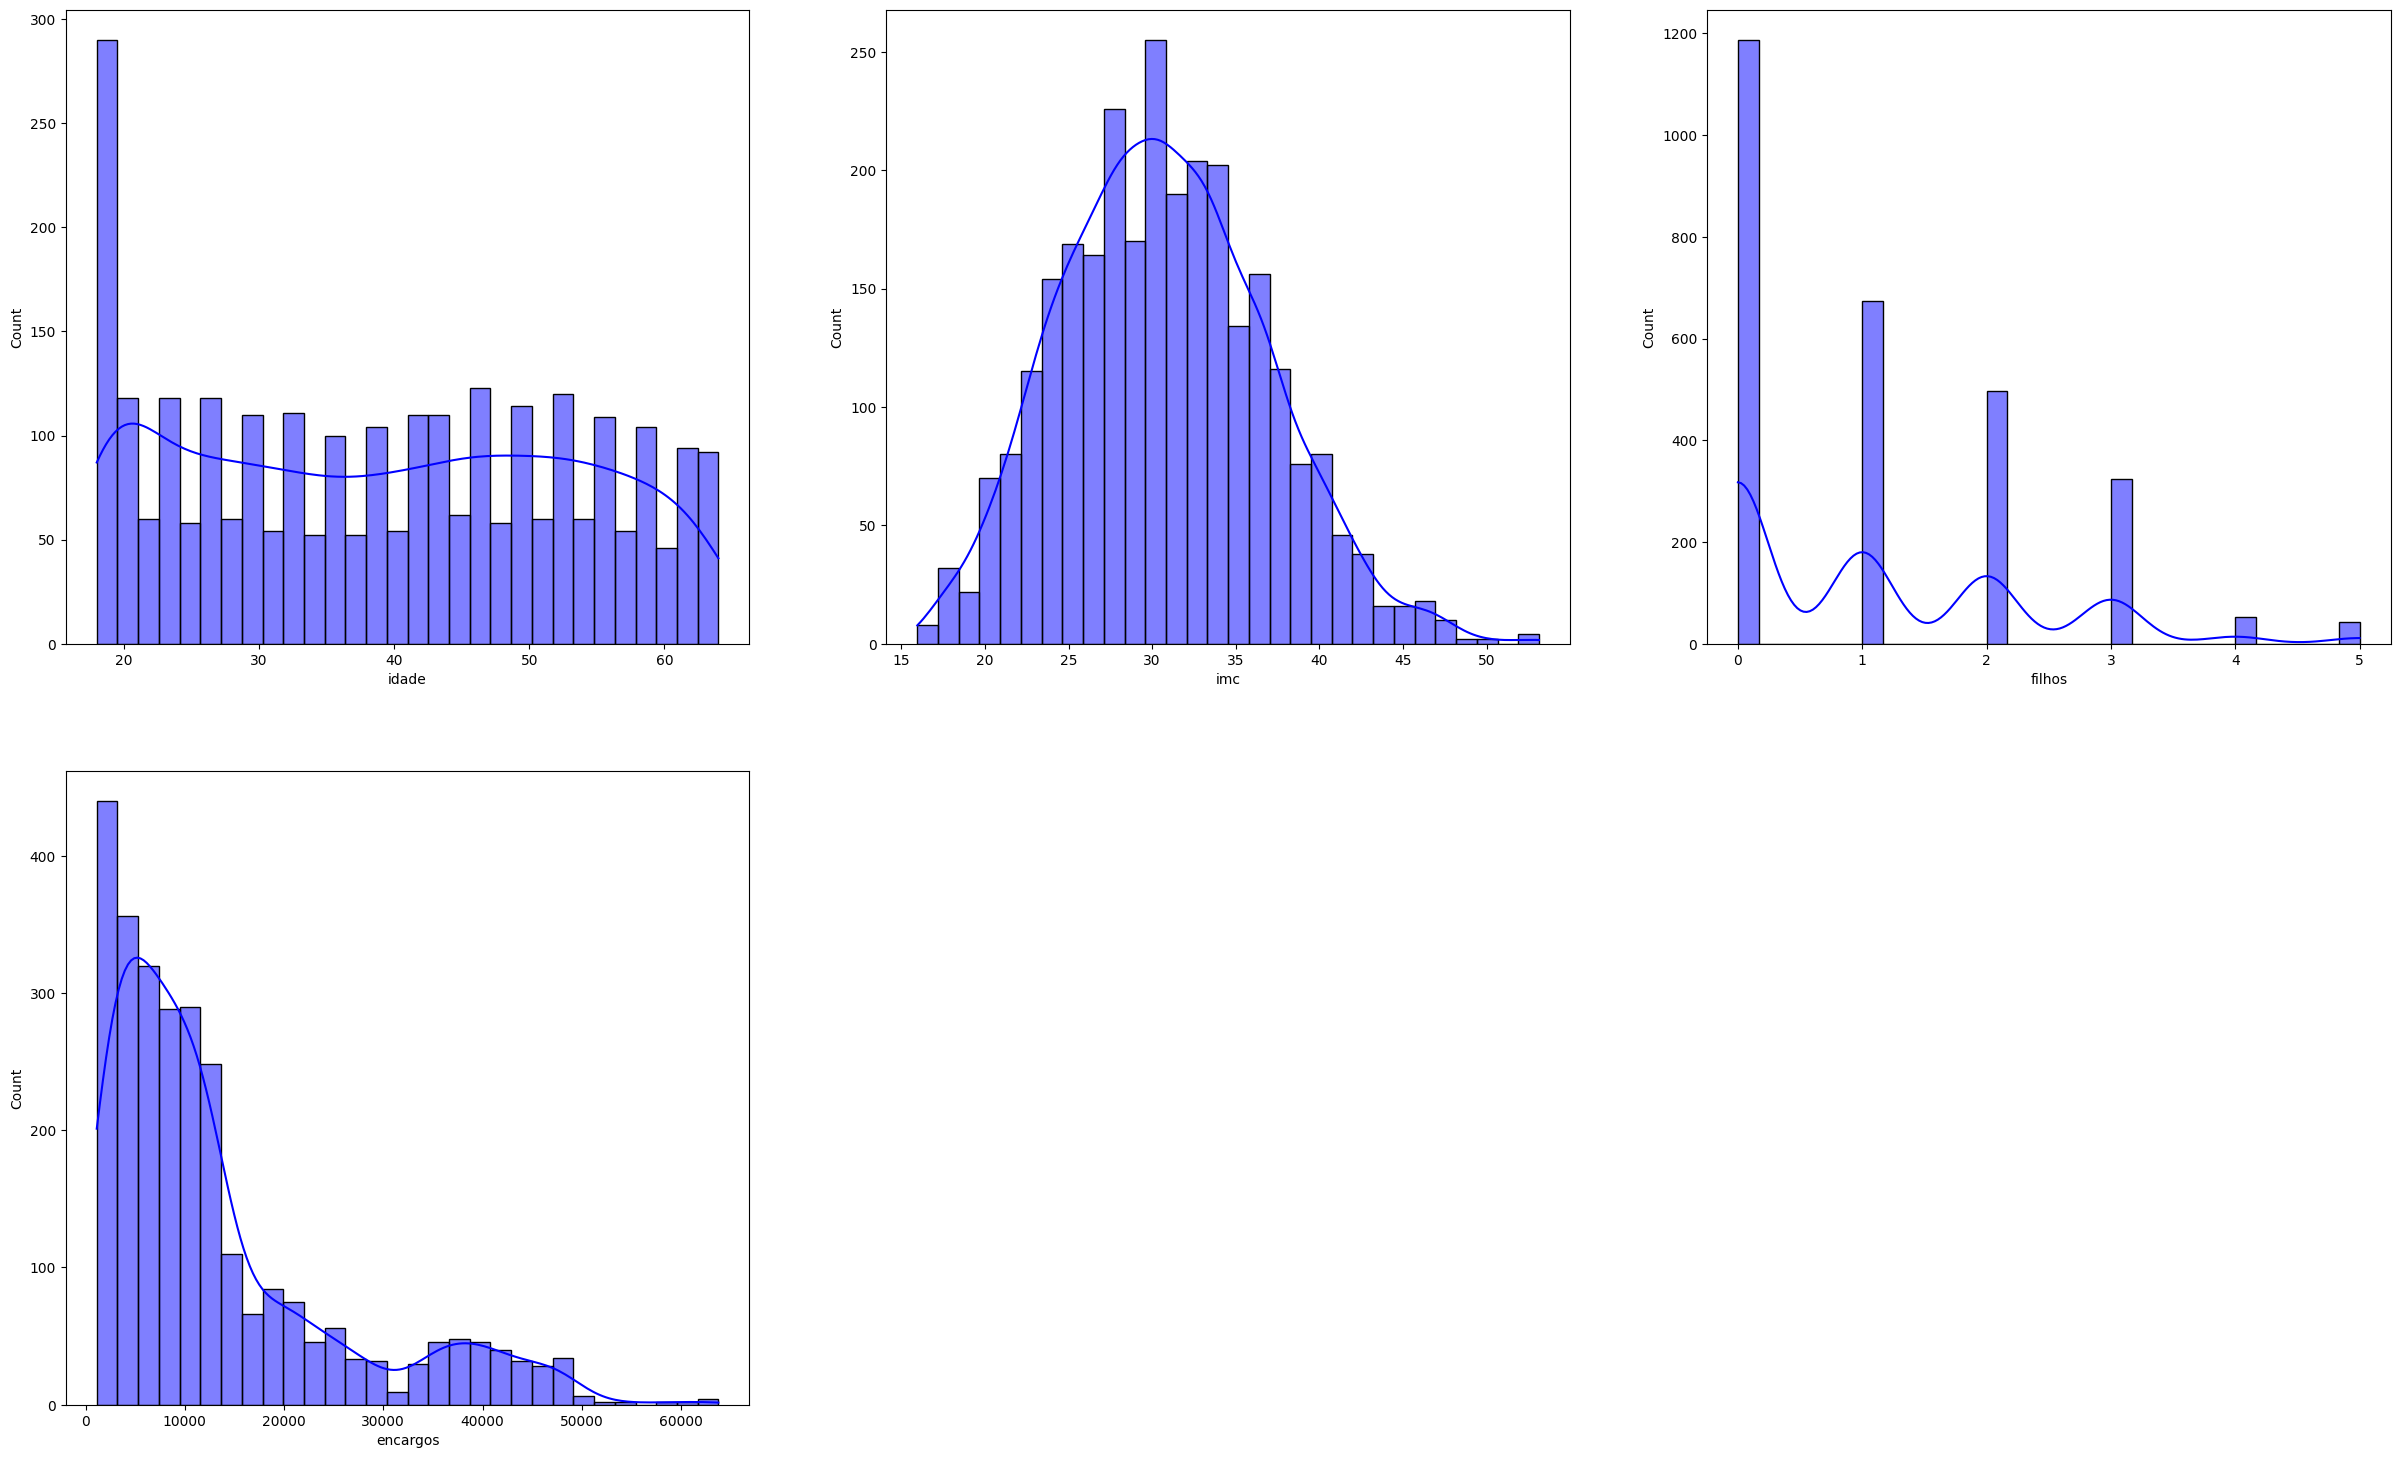

In [147]:
plt.figure(figsize=(30,28))
for i, col in enumerate( ['idade','imc','filhos','encargos']):
    plt.subplot(3, 3, i+1)
    sns.histplot(data = dataset,
            x = col,
            kde = True,
            bins = 30,
            color = 'blue')

plt.show()

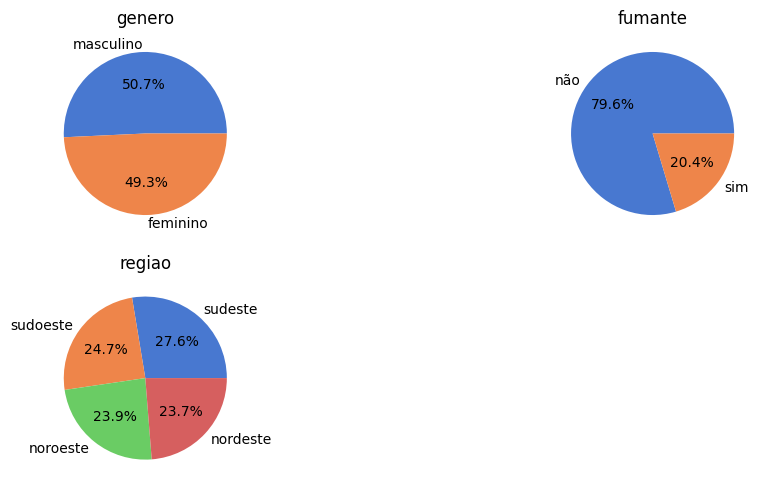

In [148]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['genero','fumante','regiao']):
    plt.subplot(3,2,i+1)
    x=dataset[col].value_counts().reset_index()
    plt.title(col)
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%",colors=sns.color_palette('muted'))

In [149]:
correlation_dataset = dataset.copy()
label_encoder = LabelEncoder()
correlation_dataset.genero = label_encoder.fit_transform(correlation_dataset.genero)
correlation_dataset.fumante = label_encoder.fit_transform(correlation_dataset.fumante)
correlation_dataset.regiao = label_encoder.fit_transform(correlation_dataset.regiao)

In [150]:
correlation_dataset.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,56,0,29.774374,2,1,3,31109.889763
1,46,1,25.857395,1,0,0,26650.702647
2,32,1,23.014840,0,0,3,21459.037990
3,19,0,27.900000,0,1,3,16884.924000
4,18,1,33.770000,1,0,2,1725.552300


<Axes: >

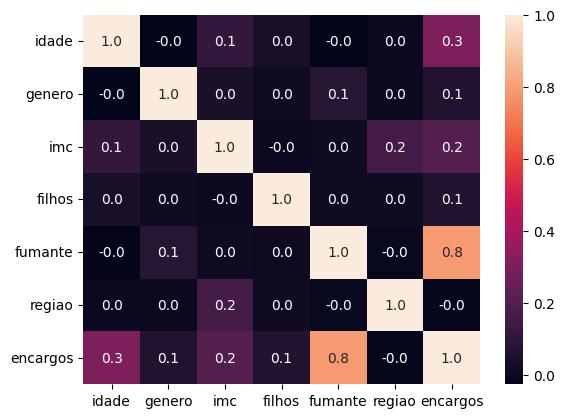

In [151]:
sns.heatmap(correlation_dataset.corr(method = 'pearson'), annot=True, fmt=".1f")

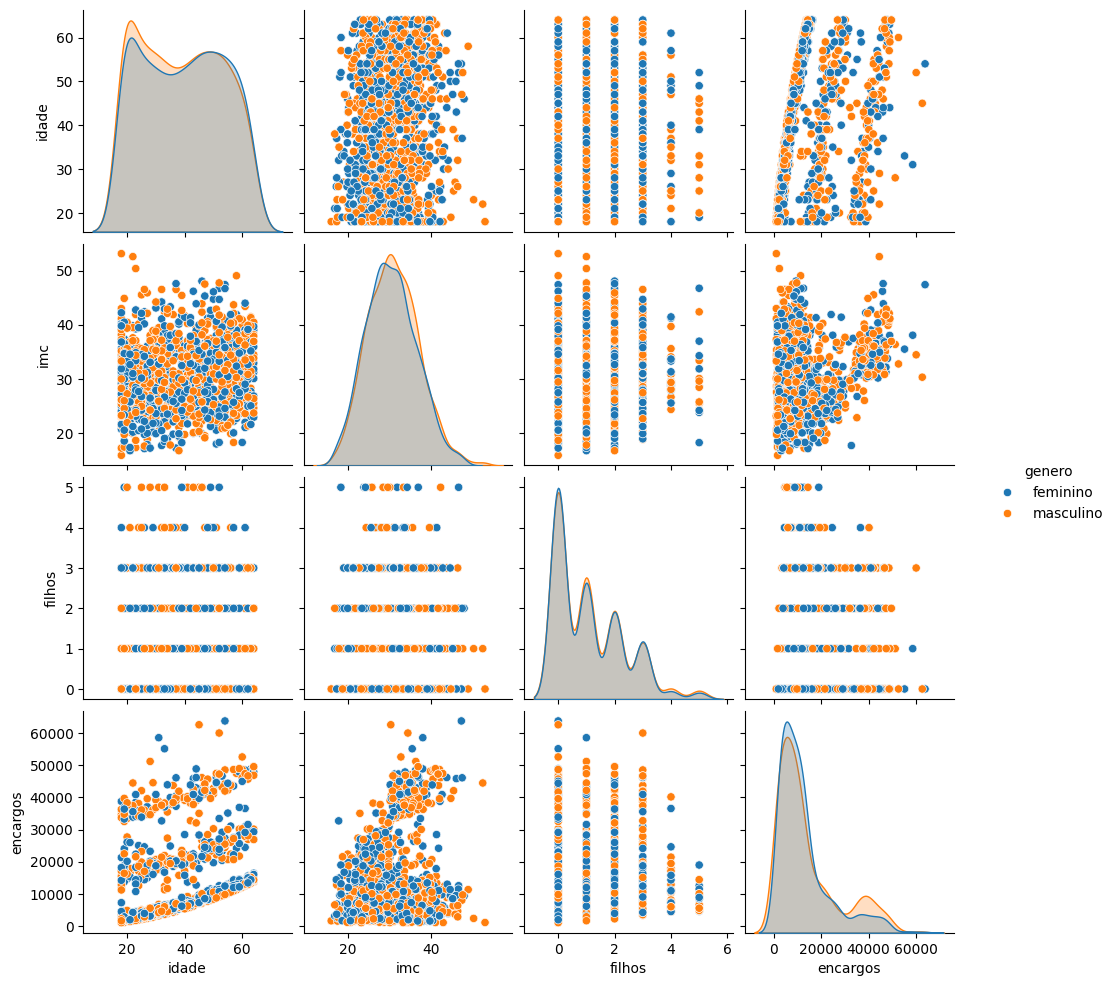

In [152]:
sns.pairplot(dataset, hue="genero")

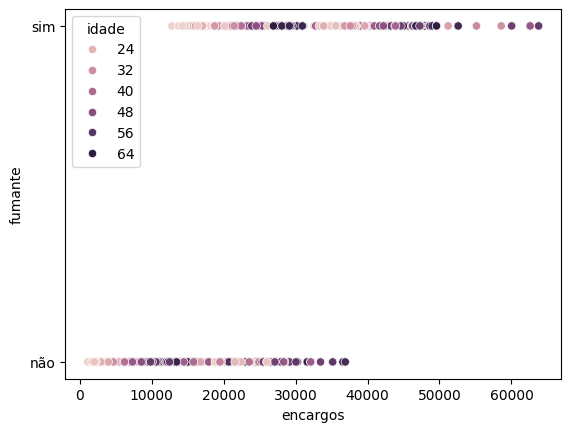

In [153]:
sns.scatterplot(data=dataset,x=dataset.encargos,y=dataset.fumante,hue=dataset.idade)
plt.show()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5908\2744511989.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='encargos', data=dataset, palette='hls')


<Axes: ylabel='encargos'>

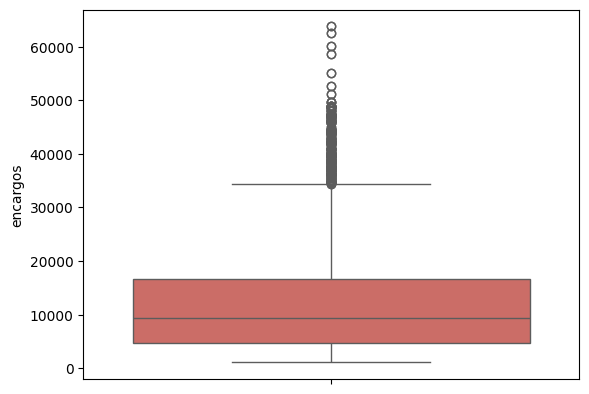

In [154]:
sns.boxplot(y='encargos', data=dataset, palette='hls')

In [155]:
dataset=dataset[np.abs(stats.zscore(dataset.encargos)) < 3]

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5908\2744511989.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='encargos', data=dataset, palette='hls')


<Axes: ylabel='encargos'>

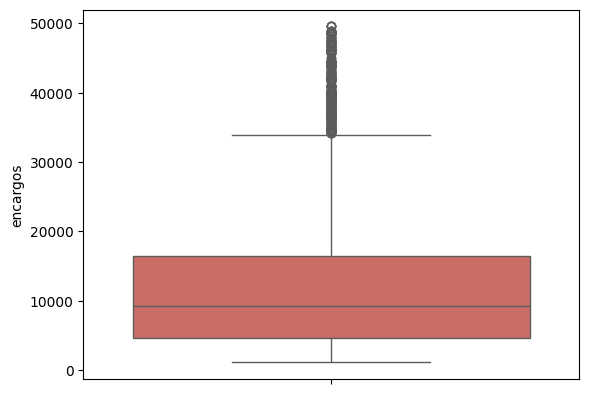

In [156]:
sns.boxplot(y='encargos', data=dataset, palette='hls')

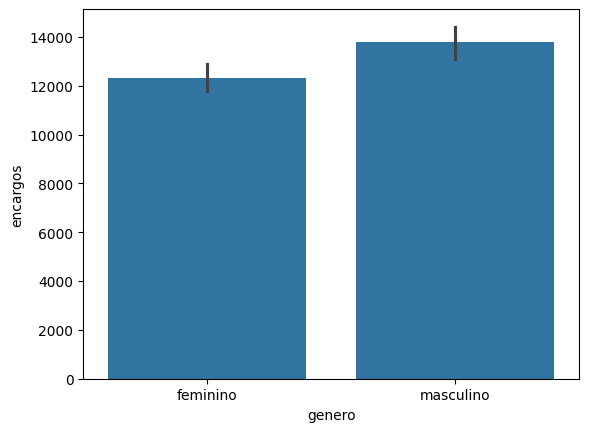

In [157]:
sns.barplot(data=dataset,x=dataset.genero,y=dataset.encargos,estimator=np.mean)
plt.show()

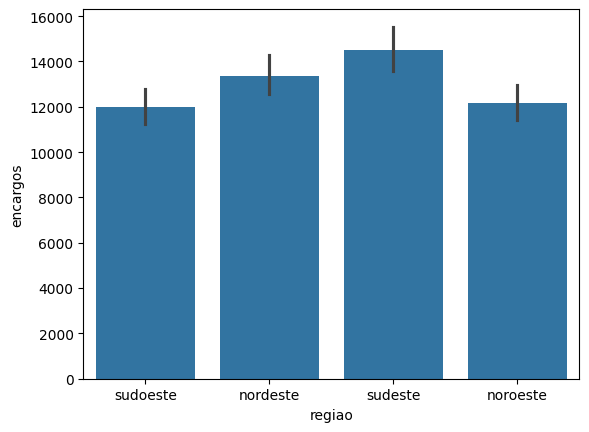

In [158]:
sns.barplot(data=dataset,x=dataset.regiao,y=dataset.encargos,estimator=np.mean)
plt.show()

In [159]:
dummies = pd.get_dummies(dataset[['genero','regiao','fumante']],dtype=int)
dataset = pd.concat([dataset[['idade','imc','filhos','encargos']],dummies],axis=1)

In [160]:
dataset.head()

,idade,imc,filhos,encargos,genero_feminino,genero_masculino,regiao_nordeste,regiao_noroeste,regiao_sudeste,regiao_sudoeste,fumante_não,fumante_sim
0,56,29.774374,2,31109.889763,1,0,0,0,0,1,0,1
1,46,25.857395,1,26650.702647,0,1,1,0,0,0,1,0
2,32,23.014840,0,21459.037990,0,1,0,0,0,1,1,0
3,19,27.900000,0,16884.924000,1,0,0,0,0,1,0,1
4,18,33.770000,1,1725.552300,0,1,0,0,1,0,1,0


In [162]:
dataset = dataset.round(2)

In [163]:
X = dataset.drop(['encargos'], axis=1)
y = dataset['encargos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [164]:
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [165]:
def generate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    abs = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape_result = calculate_mape(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {abs}')
    print(f'R-squared: {r2}')
    print(f"O MAPE é: {mape_result:.2f}%")

In [166]:
def plot_score_graphic(y_test, y_pred):
    # Plotar Grafico
    plt.figure(figsize=(15, 10))
    plt.scatter(y_test, y_test, color='green', label='Encargos Reais')
    plt.scatter(y_test, y_pred, color='red', label='Previsão de Encargos')
    plt.title('Previsão de Encargos vs Encargos Reais')
    plt.xlabel('Encargos Reais')
    plt.ylabel('Previsão de Encargos')
    plt.legend()
    plt.grid(True)
    plt.show()

In [167]:
def calculate_score(model, X_train, X_test, y_train, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'O score de treino é: {train_score}')
    print(f'O score de test é: {test_score}')

In [130]:
def cross_validation(X_train, x_axis, y_train, y_axis):
  kfold  = KFold(n_splits=10, shuffle=True) 

  x = x_axis
  y = y_axis

  linear = LinearRegression()
  linear.fit(X_train, y_train)

  knn = KNeighborsRegressor(n_neighbors=8, metric= 'euclidean', weights='distance') 
  knn.fit(X_train, y_train) 

  svm = SVR()
  svm.fit(X_train, y_train)

  rf = RandomForestRegressor(random_state=7) 
  rf.fit(X_train, y_train)

  linear_result = cross_val_score(linear, x, y, cv=kfold)
  knn_result = cross_val_score(knn, x, y, cv=kfold)
  svm_result = cross_val_score(svm, x, y, cv=kfold)
  rf_result = cross_val_score(rf, x, y, cv=kfold)

  dic_models = {
    "LINEAR": linear_result.mean(),
    "KNN": knn_result.mean(),
    "SVM": svm_result.mean(),
    "RF": rf_result.mean()
  }
  # Select the best model.
  best_model = max(dic_models, key=dic_models.get)

  print("LINEAR (R^2): {0}\nKNN (R^2): {1}\nSVM (R^2): {2}\nRandom Forest (R^2): {3}".format(linear_result.mean(), knn_result.mean(), svm_result.mean(), rf_result.mean()))
  print("O melhor modelo é : {0} com o valor: {1}".format(best_model, dic_models[best_model]))

In [131]:
cross_validation(X_train, X, y_train, y)

LINEAR (R^2): 0.7484268554561964
KNN (R^2): 0.9398383039782351
SVM (R^2): -0.10121579392136756
Random Forest (R^2): 0.9604786608679514
O melhor modelo é : RF com o valor: 0.9604786608679514


In [138]:
random_grid = {
    'n_estimators': [10, 30 , 40, 100, 150, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'bootstrap': [True, False]
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=2,
    random_state=42,
    n_jobs = -1
)# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [168]:

forest_model = RandomForestRegressor(
    n_estimators= 800,
    min_samples_split= 2,
    min_samples_leaf= 1,
    max_features= 'sqrt',
    max_depth= 90,
    bootstrap= False,
    random_state=42
)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

generate_metrics(y_test, y_pred)
calculate_score(forest_model, X_train, X_test, y_train, y_test)


Mean Squared Error: 8028490.141945865
Mean Absolute Error: 718.1072869513702
R-squared: 0.9423285649420209
O MAPE é: 7.13%
O score de treino é: 0.9983517400501757
O score de test é: 0.9423285649420209


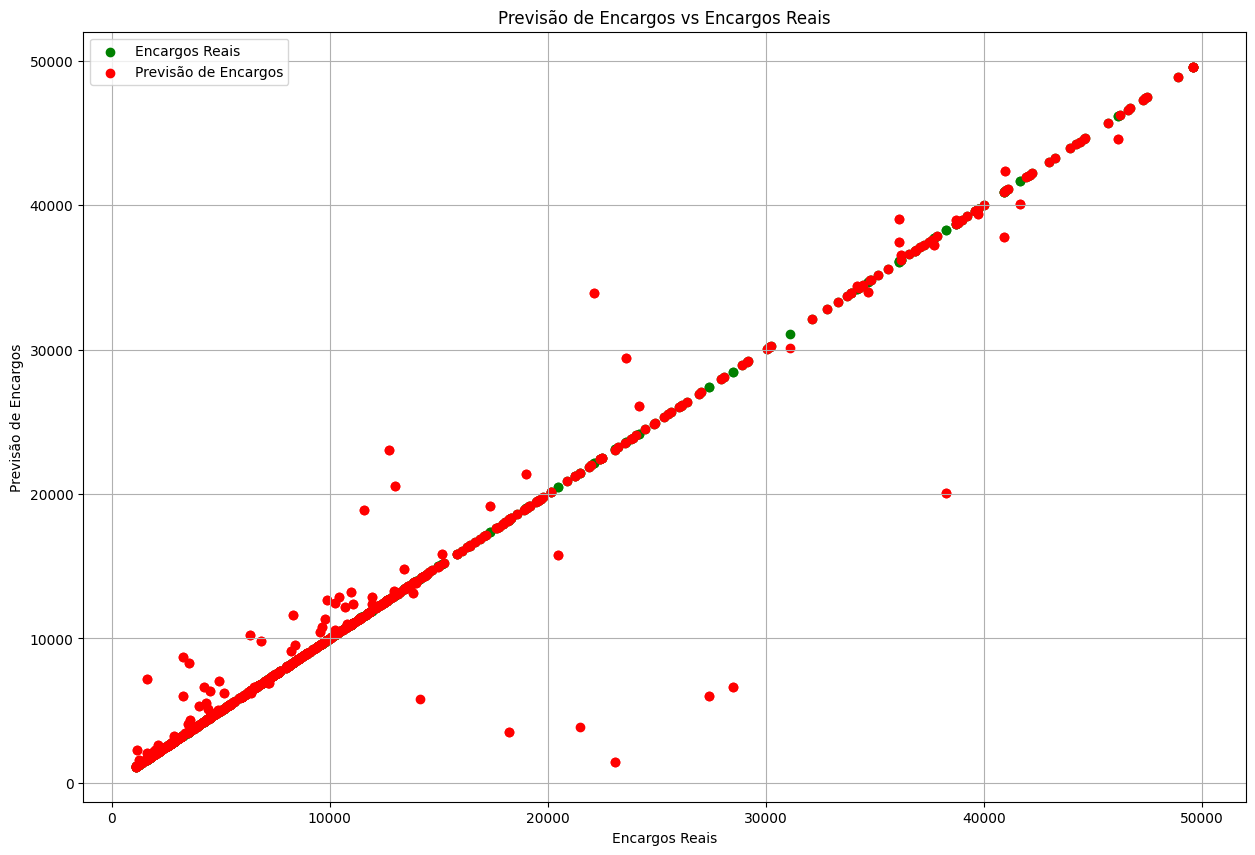

In [169]:
plot_score_graphic(y_test, y_pred)